# 📘 DDoS Attack Detection Using Machine Learning
This notebook implements a DDoS detection system using the CICIDS2017 dataset and various machine learning techniques such as Linear Regression, Decision Tree, Random Forest and Hyrbid (DT + RF) Algorithm.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading and inspecting the dataset
df = pd.read_csv('Tuesday-WorkingHours.pcap_ISCX.csv')
df.columns = df.columns.str.strip()
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
# Clean the dataset
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
X = df.drop('Label', axis=1)
y = df['Label']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

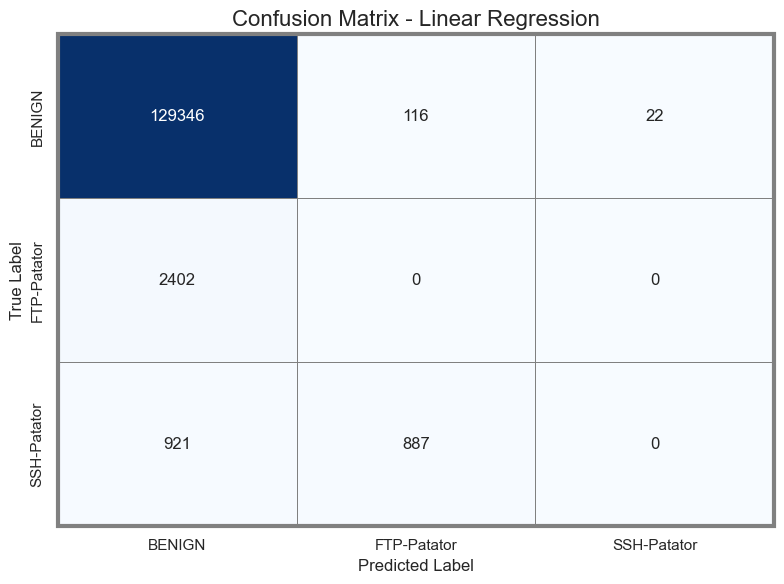

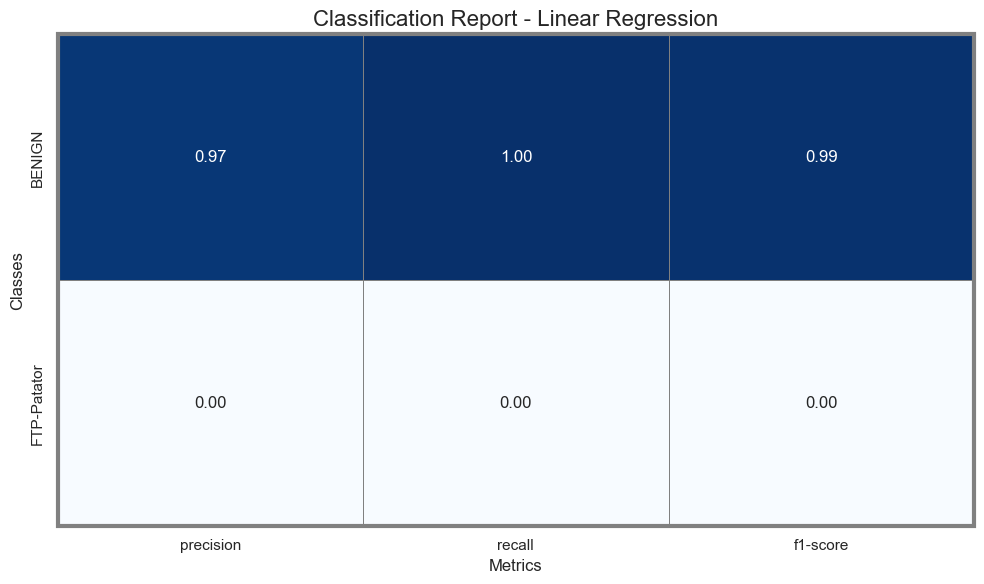

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# ---- Load Your DataFrame (Assume already loaded as df) ----
# Example:
# df = pd.read_csv("your_file.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Feature and label split
X = df.drop('Label', axis=1)
y = df['Label']

# Label encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict, round, and clip
y_pred_continuous = lr_model.predict(X_test)
y_pred_rounded = np.rint(y_pred_continuous).astype(int)
y_pred_rounded = np.clip(y_pred_rounded, 0, len(le.classes_) - 1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rounded, labels=list(range(len(le.classes_))))
class_names = le.classes_

# Plot Confusion Matrix with Border
plt.figure(figsize=(8, 6), facecolor='white')
sns.set(style='whitegrid')
ax1 = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                  xticklabels=class_names,
                  yticklabels=class_names,
                  cbar=False, linewidths=0.5, linecolor='gray')

# Add 4-border rectangle
ax1.add_patch(Rectangle((0, 0), len(class_names), len(class_names),
                        fill=False, edgecolor='gray', lw=3, clip_on=False))

plt.title("Confusion Matrix - Linear Regression", fontsize=16)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Classification Report
report_dict = classification_report(
    y_test,
    y_pred_rounded,
    labels=list(range(len(le.classes_))),
    target_names=class_names,
    zero_division=0,
    output_dict=True
)

report_df = pd.DataFrame(report_dict).transpose().round(2)
report_df = report_df.drop(['accuracy'], errors='ignore')

# Plot Classification Report with Border
plt.figure(figsize=(10, 6), facecolor='white')
sns.set(style='whitegrid')
ax2 = sns.heatmap(report_df.iloc[:-3, :-1], annot=True, cmap='Blues',
                  cbar=False, fmt=".2f", linewidths=0.5, linecolor='gray')

# Add 4-border rectangle
rows, cols = report_df.iloc[:-3, :-1].shape
ax2.add_patch(Rectangle((0, 0), cols, rows,
                        fill=False, edgecolor='gray', lw=3, clip_on=False))

plt.title("Classification Report - Linear Regression", fontsize=16)
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()


In [6]:
#  Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

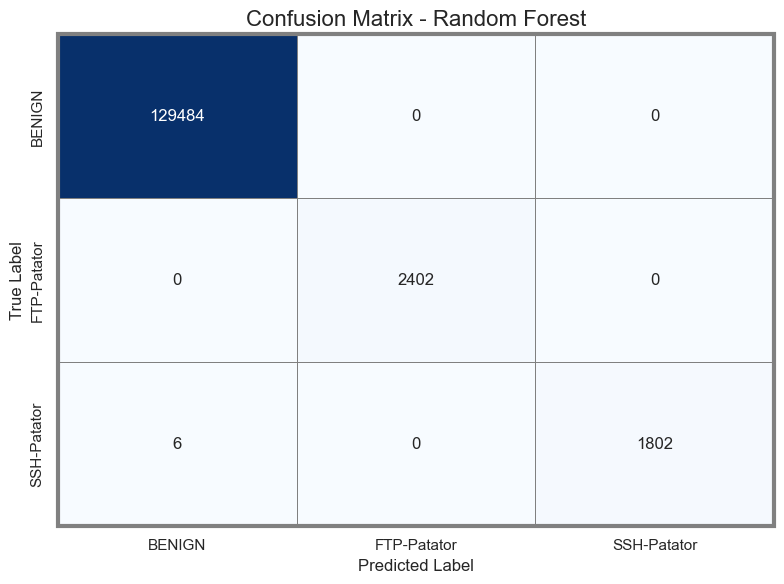

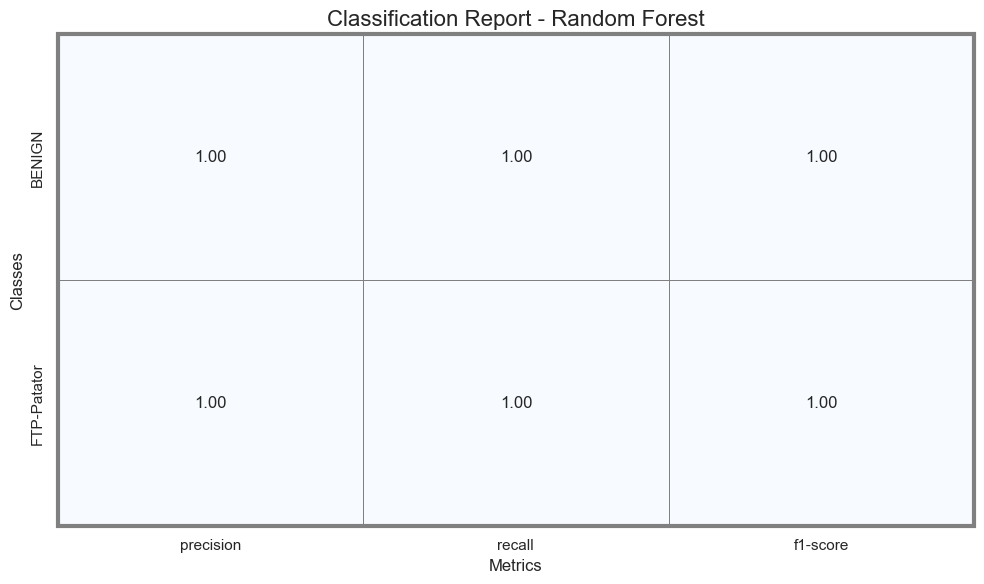

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# ---- Load DataFrame (Assume already loaded as df) ----
# Example: df = pd.read_csv("your_file.csv")
df.columns = df.columns.str.strip()

# Feature and label split
X = df.drop('Label', axis=1)
y = df['Label']

# Label encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=list(range(len(le.classes_))))
class_names = le.classes_

plt.figure(figsize=(8, 6), facecolor='white')
sns.set(style='whitegrid')
ax = sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
                 xticklabels=class_names,
                 yticklabels=class_names,
                 cbar=False, linewidths=0.5, linecolor='gray')

# Add outer border
ax.add_patch(Rectangle((0, 0), len(class_names), len(class_names),
                       fill=False, edgecolor='gray', lw=3, clip_on=False))

plt.title("Confusion Matrix - Random Forest", fontsize=16)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Classification Report
report_dict_rf = classification_report(
    y_test,
    y_pred_rf,
    labels=list(range(len(le.classes_))),
    target_names=class_names,
    zero_division=0,
    output_dict=True
)

report_df_rf = pd.DataFrame(report_dict_rf).transpose().round(2)
report_df_rf = report_df_rf.drop(['accuracy'], errors='ignore')

plt.figure(figsize=(10, 6), facecolor='white')
sns.set(style='whitegrid')
ax2 = sns.heatmap(report_df_rf.iloc[:-3, :-1], annot=True, cmap='Blues',
                  cbar=False, fmt=".2f", linewidths=0.5, linecolor='gray')

# Add outer border
rows, cols = report_df_rf.iloc[:-3, :-1].shape
ax2.add_patch(Rectangle((0, 0), cols, rows,
                        fill=False, edgecolor='gray', lw=3, clip_on=False))

plt.title("Classification Report - Random Forest", fontsize=16)
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()


In [8]:
# Train Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

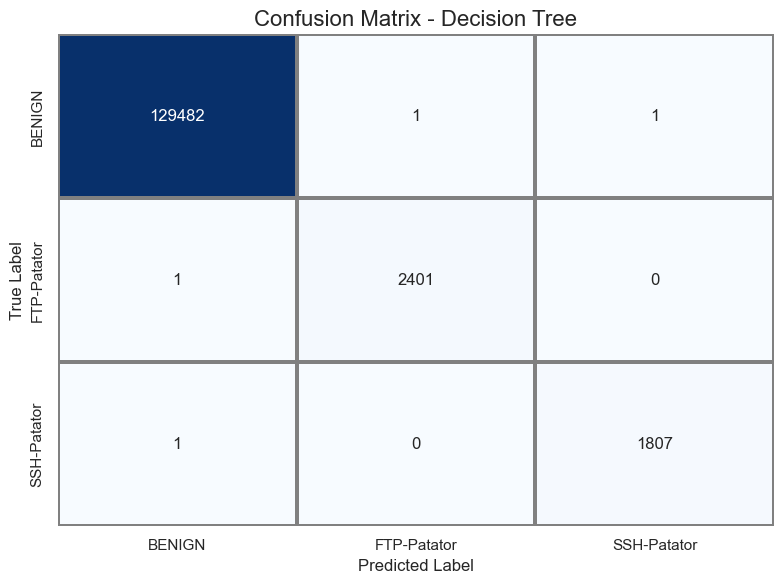

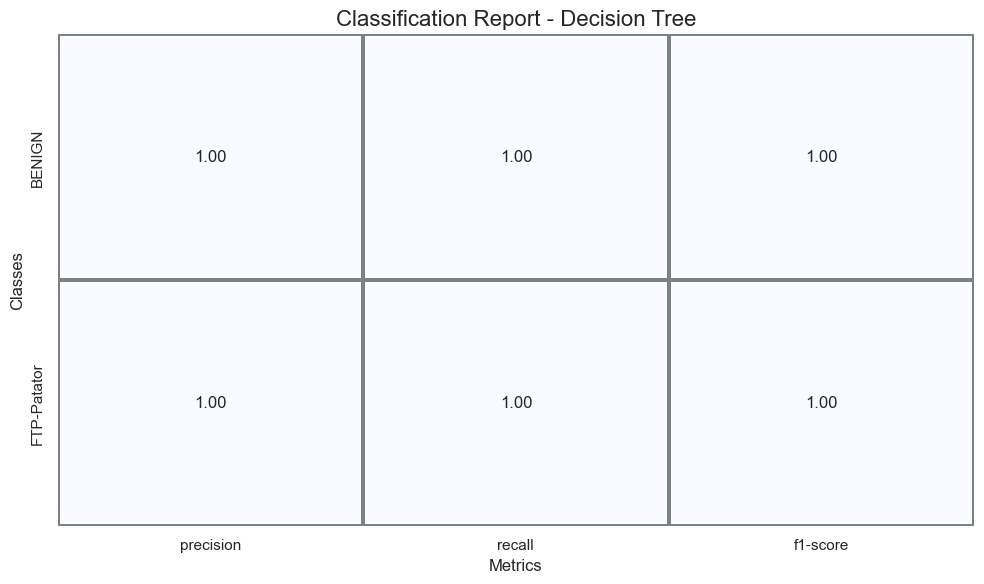

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Train Decision Tree Model ---
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# --- Predict ---
y_pred_dt = dt_model.predict(X_test)

# --- Confusion Matrix ---
all_labels_encoded = list(range(len(le.classes_)))  # Based on your label encoder
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=all_labels_encoded)
class_names = le.classes_

# --- Confusion Matrix Heatmap ---
plt.figure(figsize=(8, 6), facecolor='white')
sns.set(style='white')
sns.heatmap(cm_dt,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar=False,
            linewidths=1.5,      # Thicker border lines
            linecolor='gray')    # Gray border lines
plt.title("Confusion Matrix - Decision Tree", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()

# --- Classification Report ---
report_dict_dt = classification_report(
    y_test,
    y_pred_dt,
    labels=all_labels_encoded,
    target_names=class_names,
    zero_division=0,
    output_dict=True
)

report_df_dt = pd.DataFrame(report_dict_dt).transpose().round(2)
report_df_dt = report_df_dt.drop(['accuracy'], errors='ignore')

# --- Classification Report Heatmap ---
plt.figure(figsize=(10, 6), facecolor='white')
sns.set(style='white')
sns.heatmap(report_df_dt.iloc[:-3, :-1],
            annot=True,
            cmap='Blues',
            cbar=False,
            fmt=".2f",
            linewidths=1.5,
            linecolor='gray')
plt.title("Classification Report - Decision Tree", fontsize=16)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Classes", fontsize=12)
plt.tight_layout()
plt.show()


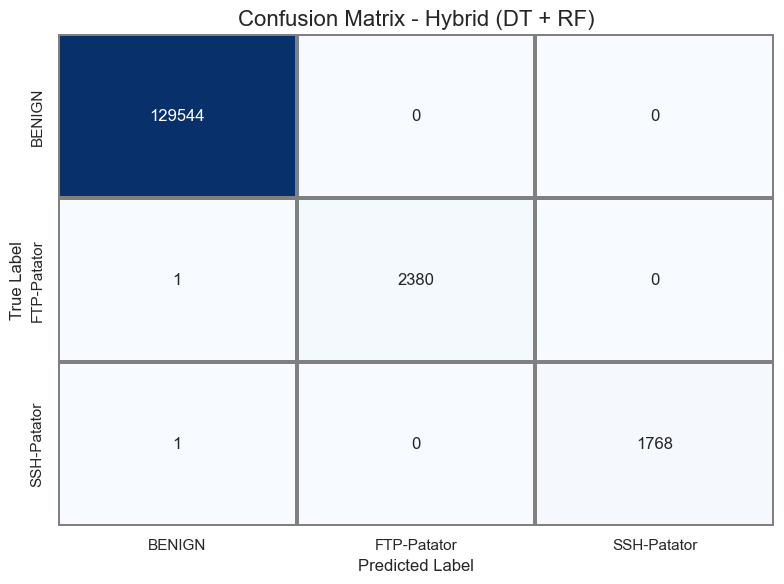

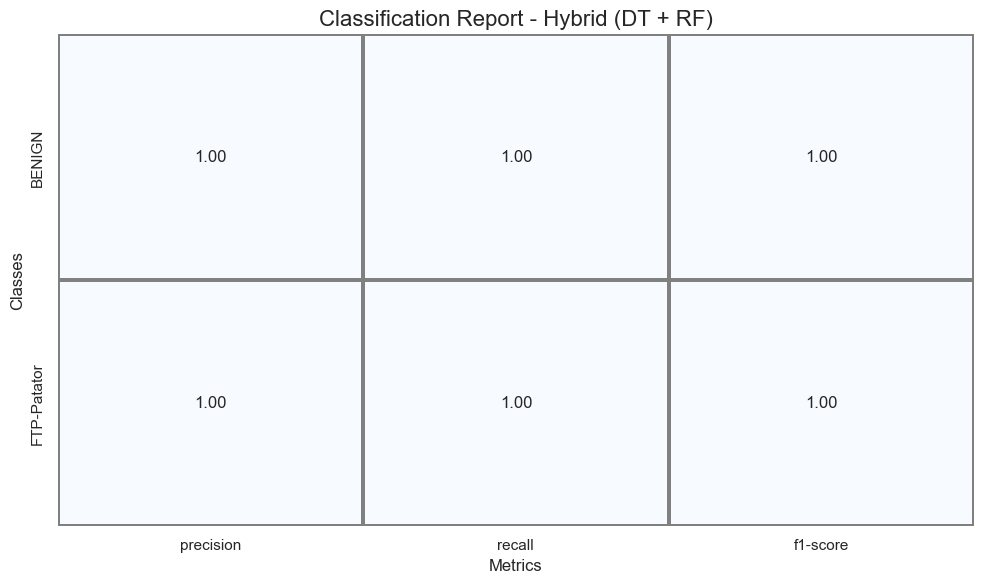

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Preparation ---
X = df.drop('Label', axis=1)
y = df['Label']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42
)

# --- Model Definition ---
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

hybrid2 = VotingClassifier(estimators=[('dt', dt), ('rf', rf)], voting='hard')

# --- Training ---
hybrid2.fit(X_train, y_train)

# --- Prediction ---
y_pred = hybrid2.predict(X_test)

# --- Confusion Matrix Plot ---
cm = confusion_matrix(y_test, y_pred, labels=list(range(len(le.classes_))))
class_names = le.classes_

plt.figure(figsize=(8, 6), facecolor='white')
sns.set(style='white')
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar=False,
            linewidths=1.5,
            linecolor='gray')
plt.title("Confusion Matrix - Hybrid (DT + RF)", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()

# --- Classification Report Heatmap ---
report_dict = classification_report(
    y_test,
    y_pred,
    labels=list(range(len(le.classes_))),
    target_names=class_names,
    output_dict=True,
    zero_division=0
)
report_df = pd.DataFrame(report_dict).transpose().round(2)
report_df = report_df.drop(['accuracy'], errors='ignore')

plt.figure(figsize=(10, 6), facecolor='white')
sns.set(style='white')
sns.heatmap(report_df.iloc[:-3, :-1],
            annot=True,
            fmt='.2f',
            cmap='Blues',
            cbar=False,
            linewidths=1.5,
            linecolor='gray')
plt.title("Classification Report - Hybrid (DT + RF)", fontsize=16)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Classes", fontsize=12)
plt.tight_layout()
plt.show()


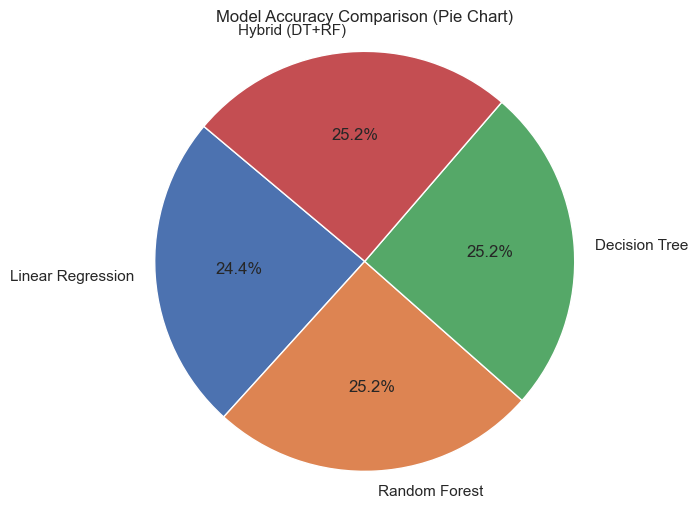

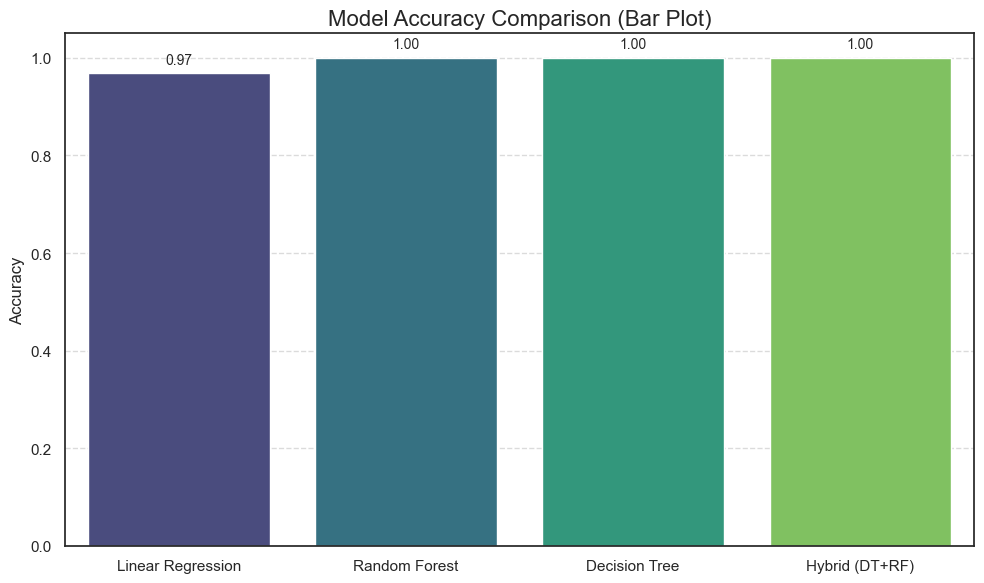

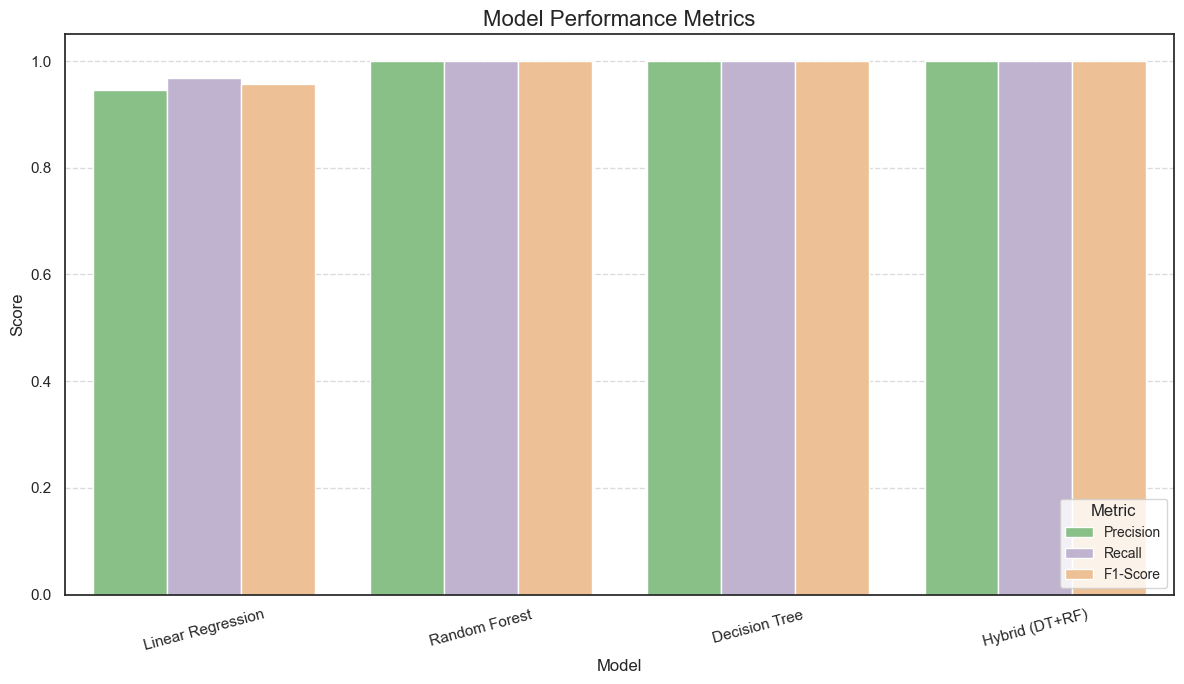


╔══════════════════════════════════════╗
║ Linear Regression - Confusion Matrix ║
╚══════════════════════════════════════╝
[[129402    111     31]
 [  2381      0      0]
 [   859    910      0]]

╔═══════════════════════════════════════════╗
║ Linear Regression - Classification Report ║
╚═══════════════════════════════════════════╝
              precision    recall  f1-score   support

      BENIGN       0.98      1.00      0.99    129544
 FTP-Patator       0.00      0.00      0.00      2381
 SSH-Patator       0.00      0.00      0.00      1769

    accuracy                           0.97    133694
   macro avg       0.33      0.33      0.33    133694
weighted avg       0.95      0.97      0.96    133694


╔══════════════════════════════════╗
║ Random Forest - Confusion Matrix ║
╚══════════════════════════════════╝
[[129544      0      0]
 [     1   2380      0]
 [     1      0   1768]]

╔═══════════════════════════════════════╗
║ Random Forest - Classification Report ║
╚════════════

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Suppress warnings
warnings.filterwarnings('ignore')

# Assume df is already loaded and cleaned
df.columns = df.columns.str.strip()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Step 1: Prepare Features and Labels
X = df.drop('Label', axis=1)
y = df['Label']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/Test Split
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X_scaled, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42
)

# Step 2: Train Models

# 1. Linear Regression (Classifier-style)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train_encoded)
y_pred_continuous = lr_model.predict(X_test)
y_pred_binary = np.rint(y_pred_continuous).astype(int)
y_pred_binary = np.clip(y_pred_binary, 0, len(le.classes_) - 1)

# 2. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train_encoded)
y_pred_dt = dt_model.predict(X_test)

# 3. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_encoded)
y_pred_rf = rf_model.predict(X_test)

# 4. Hybrid Model (Voting)
hybrid_model = VotingClassifier(estimators=[('dt', dt_model), ('rf', rf_model)], voting='hard')
hybrid_model.fit(X_train, y_train_encoded)
y_pred_hybrid = hybrid_model.predict(X_test)

# Step 3: Accuracy Comparison
accuracy_scores = [
    accuracy_score(y_test_encoded, y_pred_binary),
    accuracy_score(y_test_encoded, y_pred_rf),
    accuracy_score(y_test_encoded, y_pred_dt),
    accuracy_score(y_test_encoded, y_pred_hybrid)
]
model_names = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Hybrid (DT+RF)']

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(accuracy_scores, labels=model_names, autopct='%1.1f%%', startangle=140)
plt.title('Model Accuracy Comparison (Pie Chart)')
plt.axis('equal')
plt.show()

# Bar Chart
plt.figure(figsize=(10, 6))
plt.title('Model Accuracy Comparison (Bar Plot)', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
plt.ylim(0, 1.05)
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 4: Precision, Recall, F1
def get_metrics(y_true, y_pred):
    return {
        'Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }

metrics_df = pd.DataFrame([
    get_metrics(y_test_encoded, y_pred_binary),
    get_metrics(y_test_encoded, y_pred_rf),
    get_metrics(y_test_encoded, y_pred_dt),
    get_metrics(y_test_encoded, y_pred_hybrid)
], index=model_names)

metrics_melted = metrics_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
metrics_melted.rename(columns={'index': 'Model'}, inplace=True)

# Plot grouped bar chart for metrics
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted, palette='Accent')
plt.title('Model Performance Metrics', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.05)
plt.xticks(rotation=15)
plt.legend(title='Metric', loc='lower right', fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 5: Confusion Matrix and Classification Report
def print_border(title, content):
    border = '═' * (len(title) + 2)
    print(f"\n╔{border}╗")
    print(f"║ {title} ║")
    print(f"╚{border}╝")
    print(content)

all_labels = list(range(len(le.classes_)))
class_names = le.classes_

# Linear Regression
print_border("Linear Regression - Confusion Matrix", confusion_matrix(y_test_encoded, y_pred_binary, labels=all_labels))
print_border("Linear Regression - Classification Report", classification_report(y_test_encoded, y_pred_binary, labels=all_labels, target_names=class_names, zero_division=0))

# Random Forest
print_border("Random Forest - Confusion Matrix", confusion_matrix(y_test_encoded, y_pred_rf, labels=all_labels))
print_border("Random Forest - Classification Report", classification_report(y_test_encoded, y_pred_rf, labels=all_labels, target_names=class_names, zero_division=0))

# Decision Tree
print_border("Decision Tree - Confusion Matrix", confusion_matrix(y_test_encoded, y_pred_dt, labels=all_labels))
print_border("Decision Tree - Classification Report", classification_report(y_test_encoded, y_pred_dt, labels=all_labels, target_names=class_names, zero_division=0))

# Hybrid
print_border("Hybrid Model - Confusion Matrix", confusion_matrix(y_test_encoded, y_pred_hybrid, labels=all_labels))
print_border("Hybrid Model - Classification Report", classification_report(y_test_encoded, y_pred_hybrid, labels=all_labels, target_names=class_names, zero_division=0))
